Name: Anubhav Chatterji 
    
Batch: DS2403
    
Mentor:M.D. Kashif
    
Company: Flip Robo Technoligies

# Red Wine Quality Prediction Project

### Project Description 


The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

**Attribute Information**

**Input variables (based on physicochemical tests):**
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol

**Output variable (based on sensory data):**
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 


In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [6]:

df = pd.read_csv('winequality-red.csv')
print("Successfully Imported the Data!")
df


Successfully Imported the Data!


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

observation

We have imported the dataset.

we have 1599 rows and 12 columns


# Exploratory Data Analysis.


In [7]:
df.shape

(1599, 12)

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

We can see that the quality is categorical column, Thus it is a classification problem.

# Statistics Summary

In [12]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

**Observations**

1- The count of columns is same hence no missing values 

2 - The Mean is more than median i.e is 50th percentile in all columns.

3 - There is a large differences in 75th percentile and max in residual sugar , free sulfar dioxide ,total sulfur dioxide.

4 - The 1 and 2 observation suggest that there are outliers present in these three columns.

5 - Minimum Value of citric acid is 0 which i am not sure if it is data error or it is avalid data.

**Mean as per different qualty grade**

In [13]:
df.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.084956            15.711599             40.869906  0.996615   
7         0.076588            14.045226             35.020101  0.996104   
8         0.068444            13.277778             33.444444  0.995212   

               pH  sulphates    alcohol  
quality                                  
3        3.398000   0.570000   9.955000  
4        3.381509   0.596415  10.265094  
5        3.304949   0.620969   9.899706  
6        3.318072   0.675329  10.629519  
7        3.290754   0.741256  11.465913  
8        3.267222   0.767778  12.094444

**Observation**

1- Good quality (grade 7&8) of wine posses higher amount of alcohol, citric acid, fixed acidity,sulphates.

2- Good quality (grade 7&8) of wine posses lower amount of Volatile acidity, chlorides,low pH value.


**Creating Classification version of target variable**

1- class 1 - Good quality red wine - if  quality grade is of 7 or higher 

2- class 2 - Low quality red wine - if  quality grade is less than 7

In [88]:
df['class'] = [1 if x >= 7 else 0 for x in df['quality']]

In [89]:
df['class'].value_counts()

0    1382
1     217
Name: class, dtype: int64

In [90]:
df.groupby('class').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
class                                                                 
0           8.236831          0.547022     0.254407        2.512120   
1           8.847005          0.405530     0.376498        2.708756   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
class                                                                   
0       0.089281            16.172214             48.285818  0.996859   
1       0.075912            13.981567             34.889401  0.996030   

             pH  sulphates    alcohol   quality  
class                                            
0      3.314616   0.644754  10.251037  5.408828  
1      3.288802   0.743456  11.518049  7.082949

# Data Analysis

<Axes: >

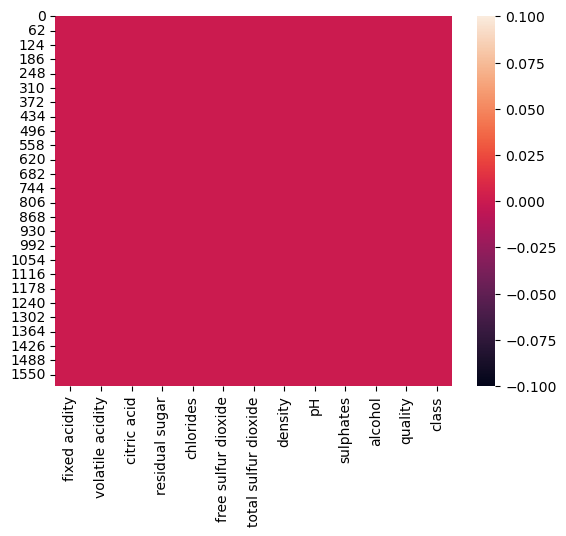

In [17]:
sns.heatmap(df.isnull())

In [18]:
missing_values = df.isnull().sum()
missing_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

In [ ]:
#no missing values

# EDA

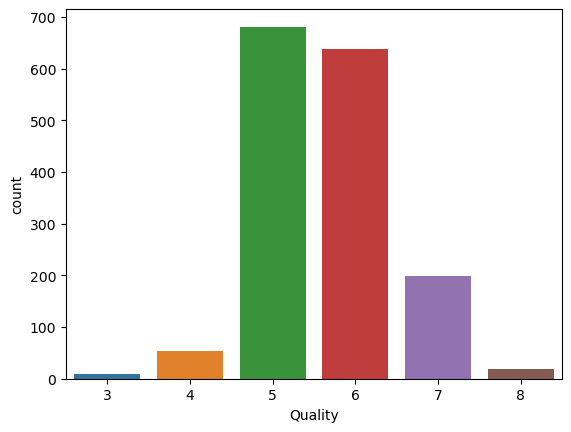

In [27]:
sns.countplot(x='quality', data=df)
plt.xlabel('Quality')
plt.show()

In [28]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Major samples belong to quality 5 and 6.

only 217 wine samples belongs to high grade ie.1 and 1382 belongs to grade 2.

-------------------------------------------------------------------------

# To check distribution of skewness

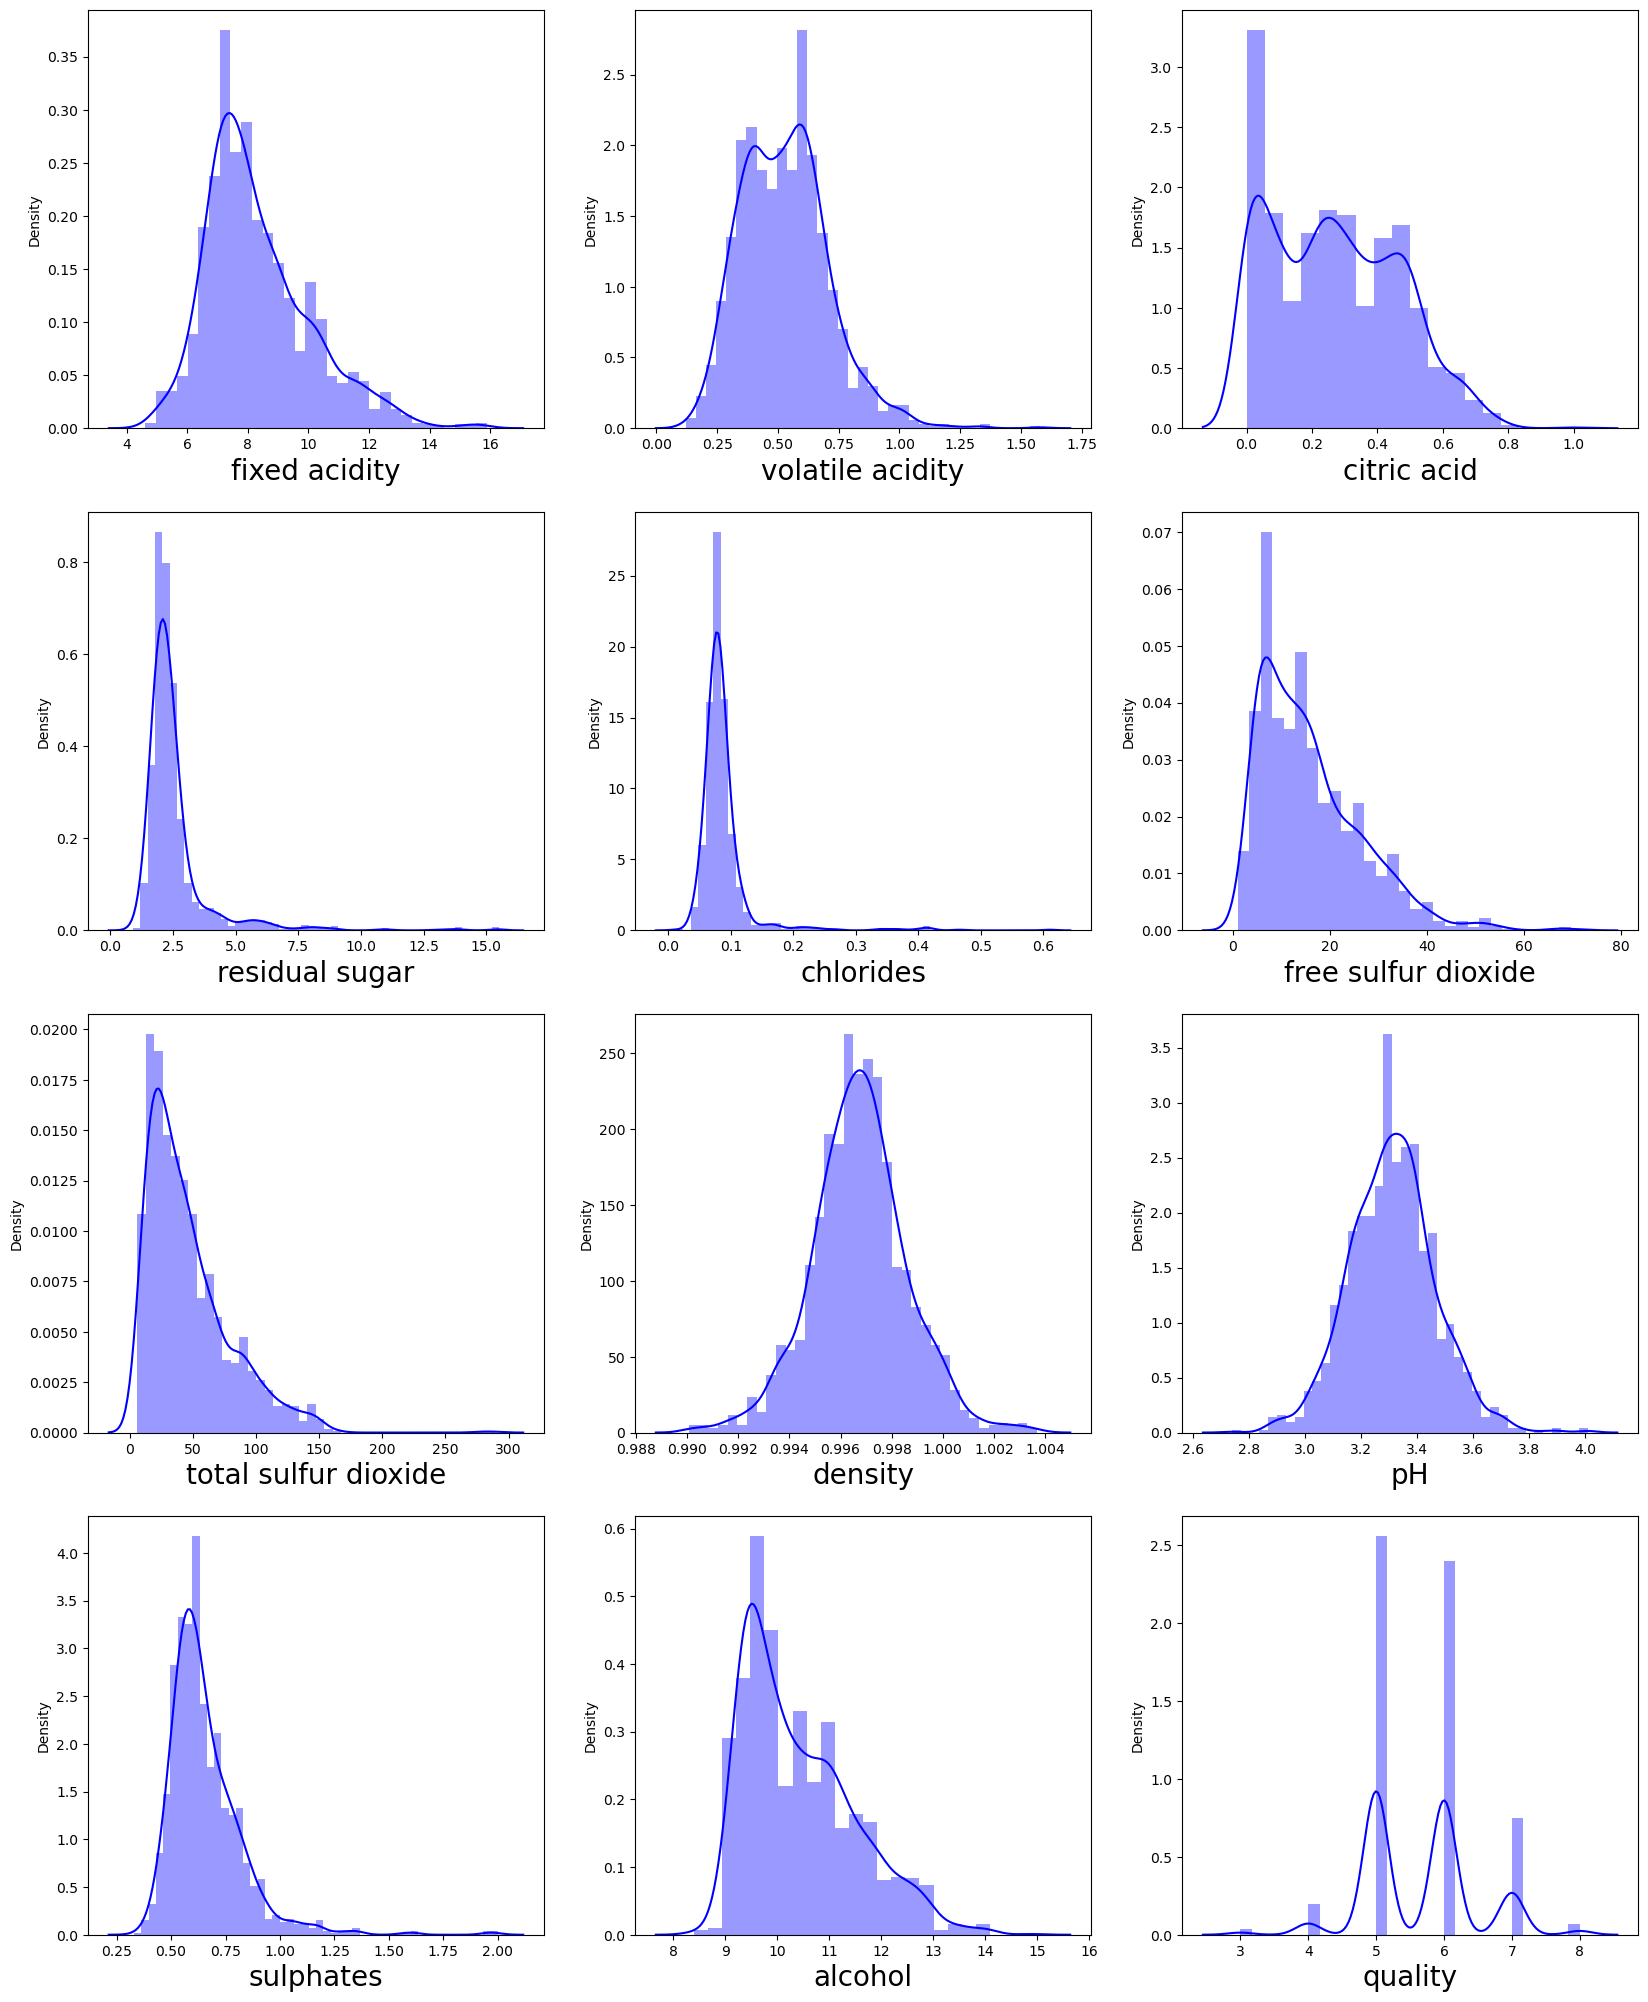

In [29]:
plt.figure(figsize=(20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color ='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

______________________________________________

-There is Skewness present in data.
________________________________________________

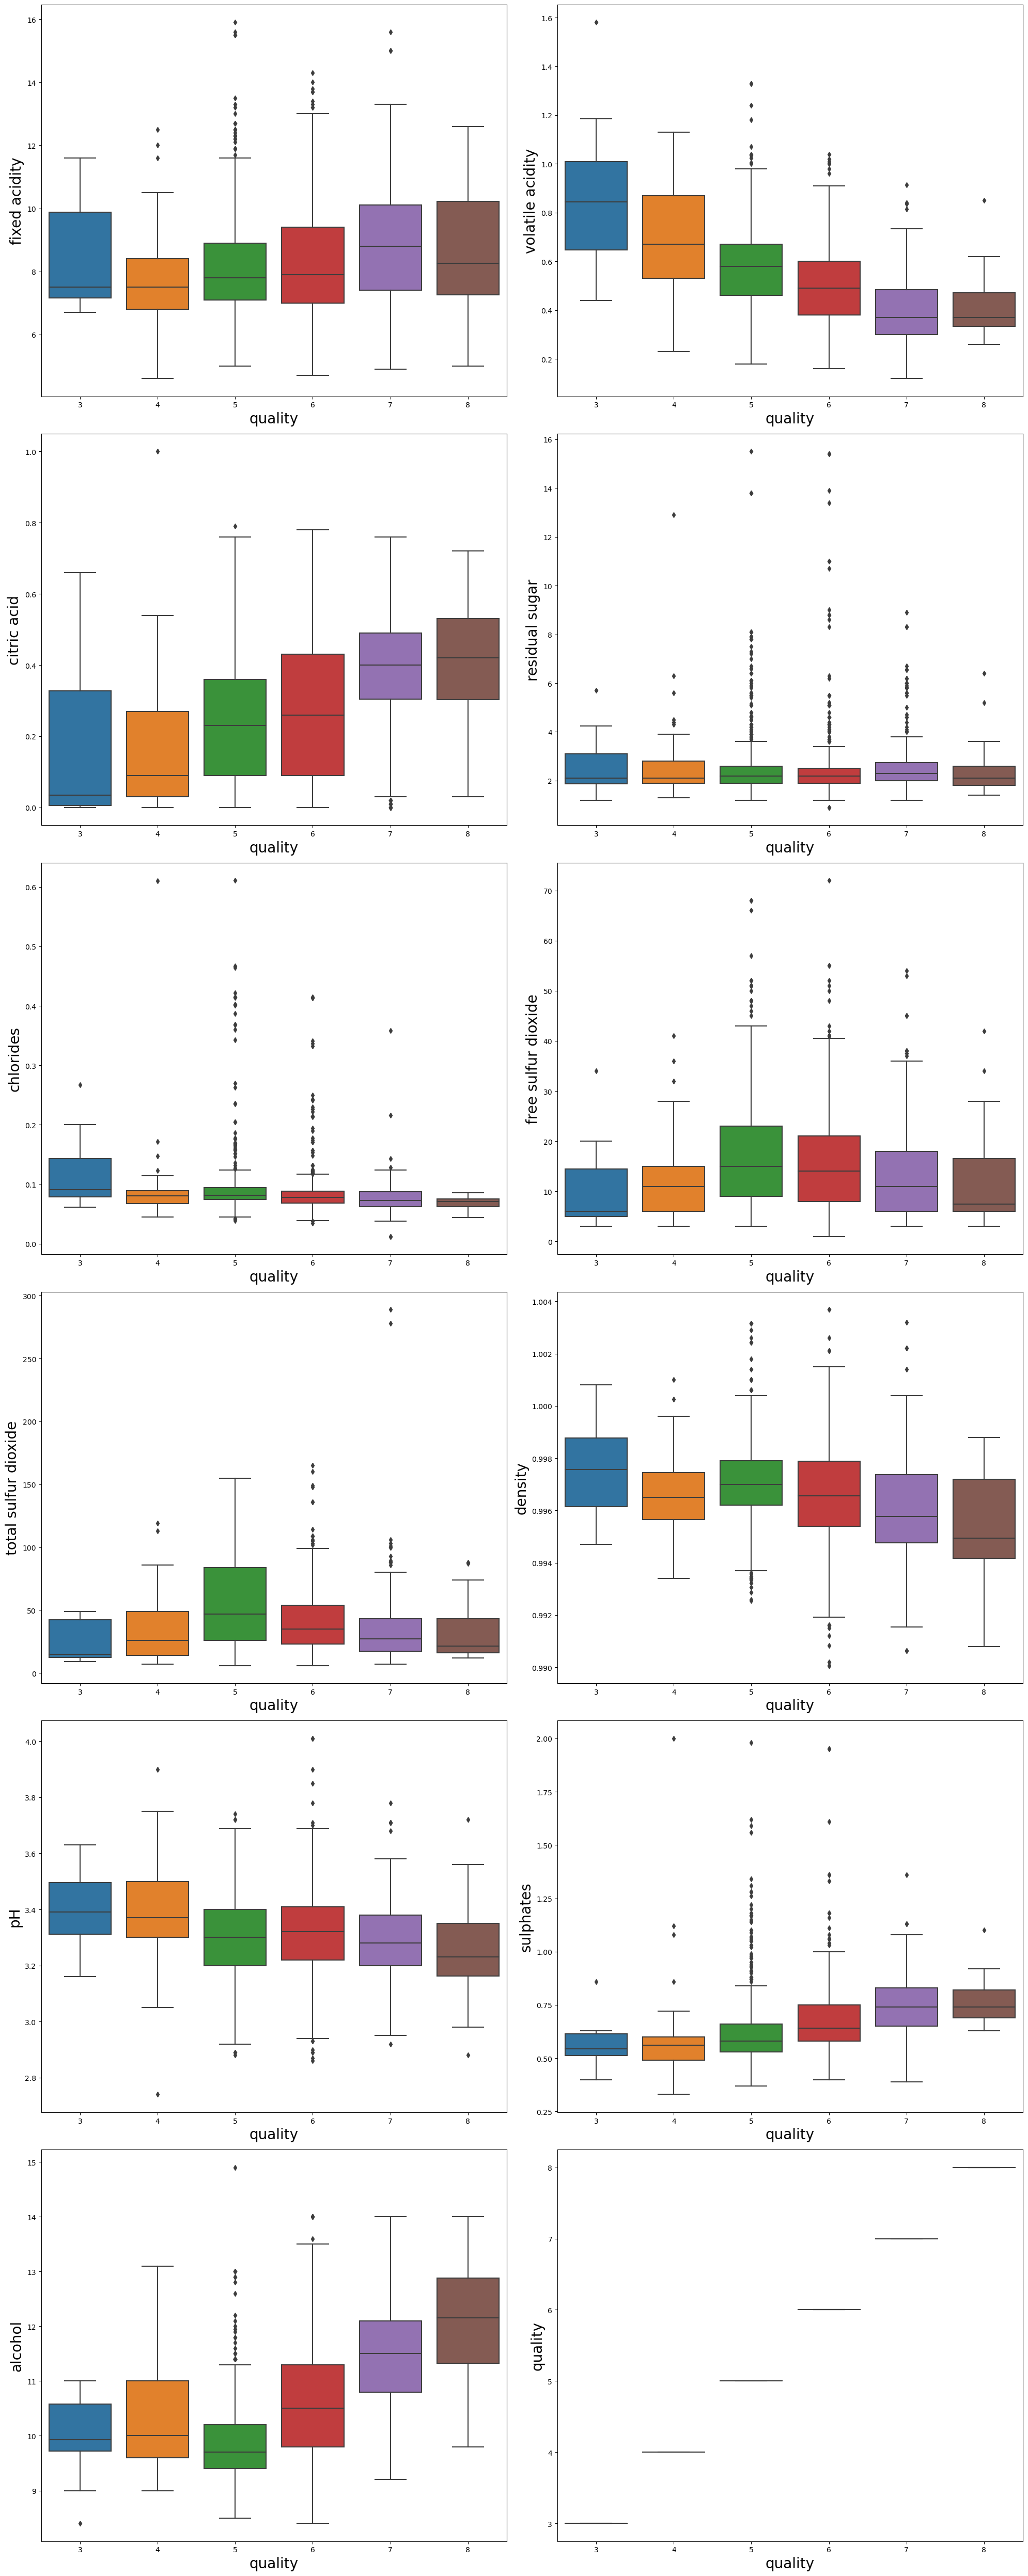

In [30]:
plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(x='quality',y=column, data=df) 
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(column, fontsize =20)
    plotnumber+=1
plt.tight_layout()
plt.show()

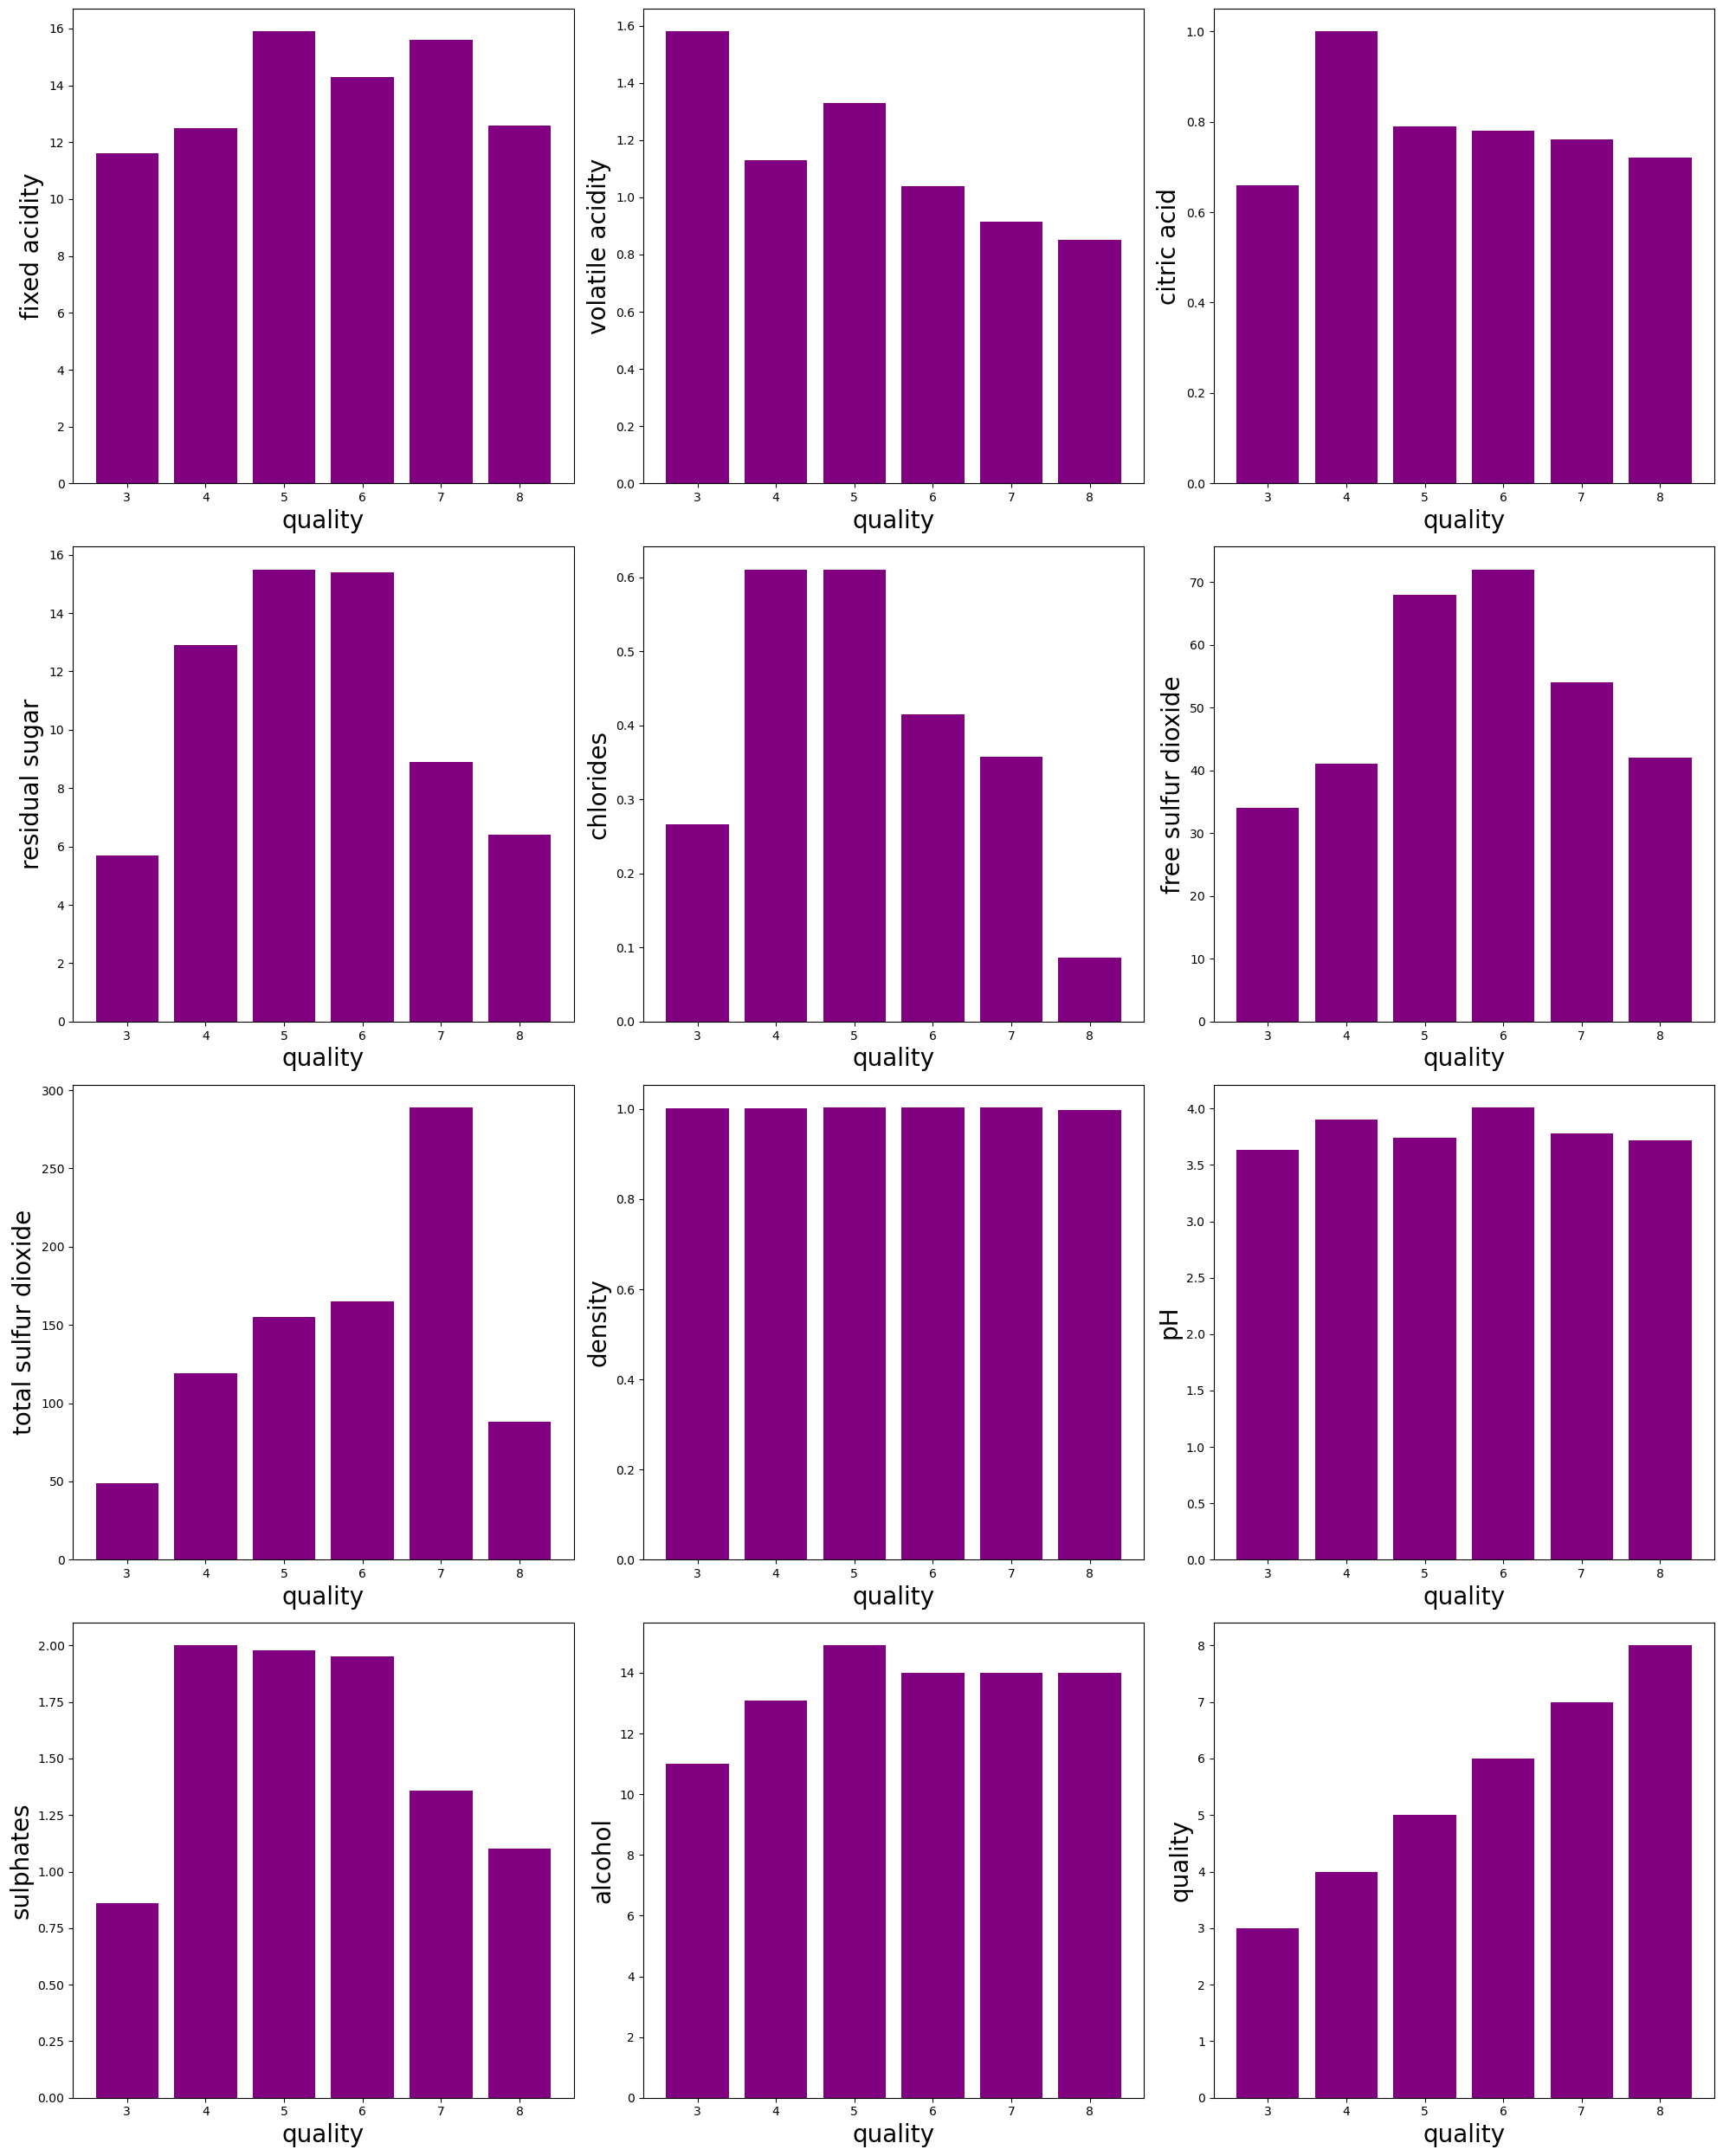

In [31]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        plt.bar(df['quality'], df[column],color='purple') 
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(column, fontsize =20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Based on quality
Good quality (grade 7 & 8) of wine posses higher amount of alcohol, fixed acidity.
Good quality (grade 7 & 8) of wine posses lower amount of low pH value,volatile acidity.
Good quality (grade 7 & 8) of wine posses moderate amount of free sulfur dioxide in range of 14-16.
Density and residual sugar are not deciding factor in determining quality of wine.
Low grade quality of wine posses lower amount of total sulfer dioxide.
Higher volatile acid lower the quality of wine.

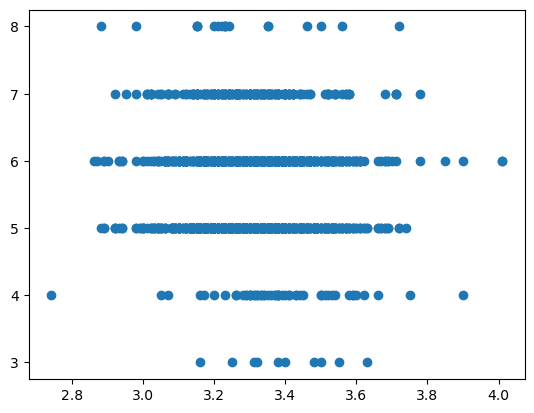

In [32]:
# bivariate analysis
plt.scatter(df['pH'],df['quality'])

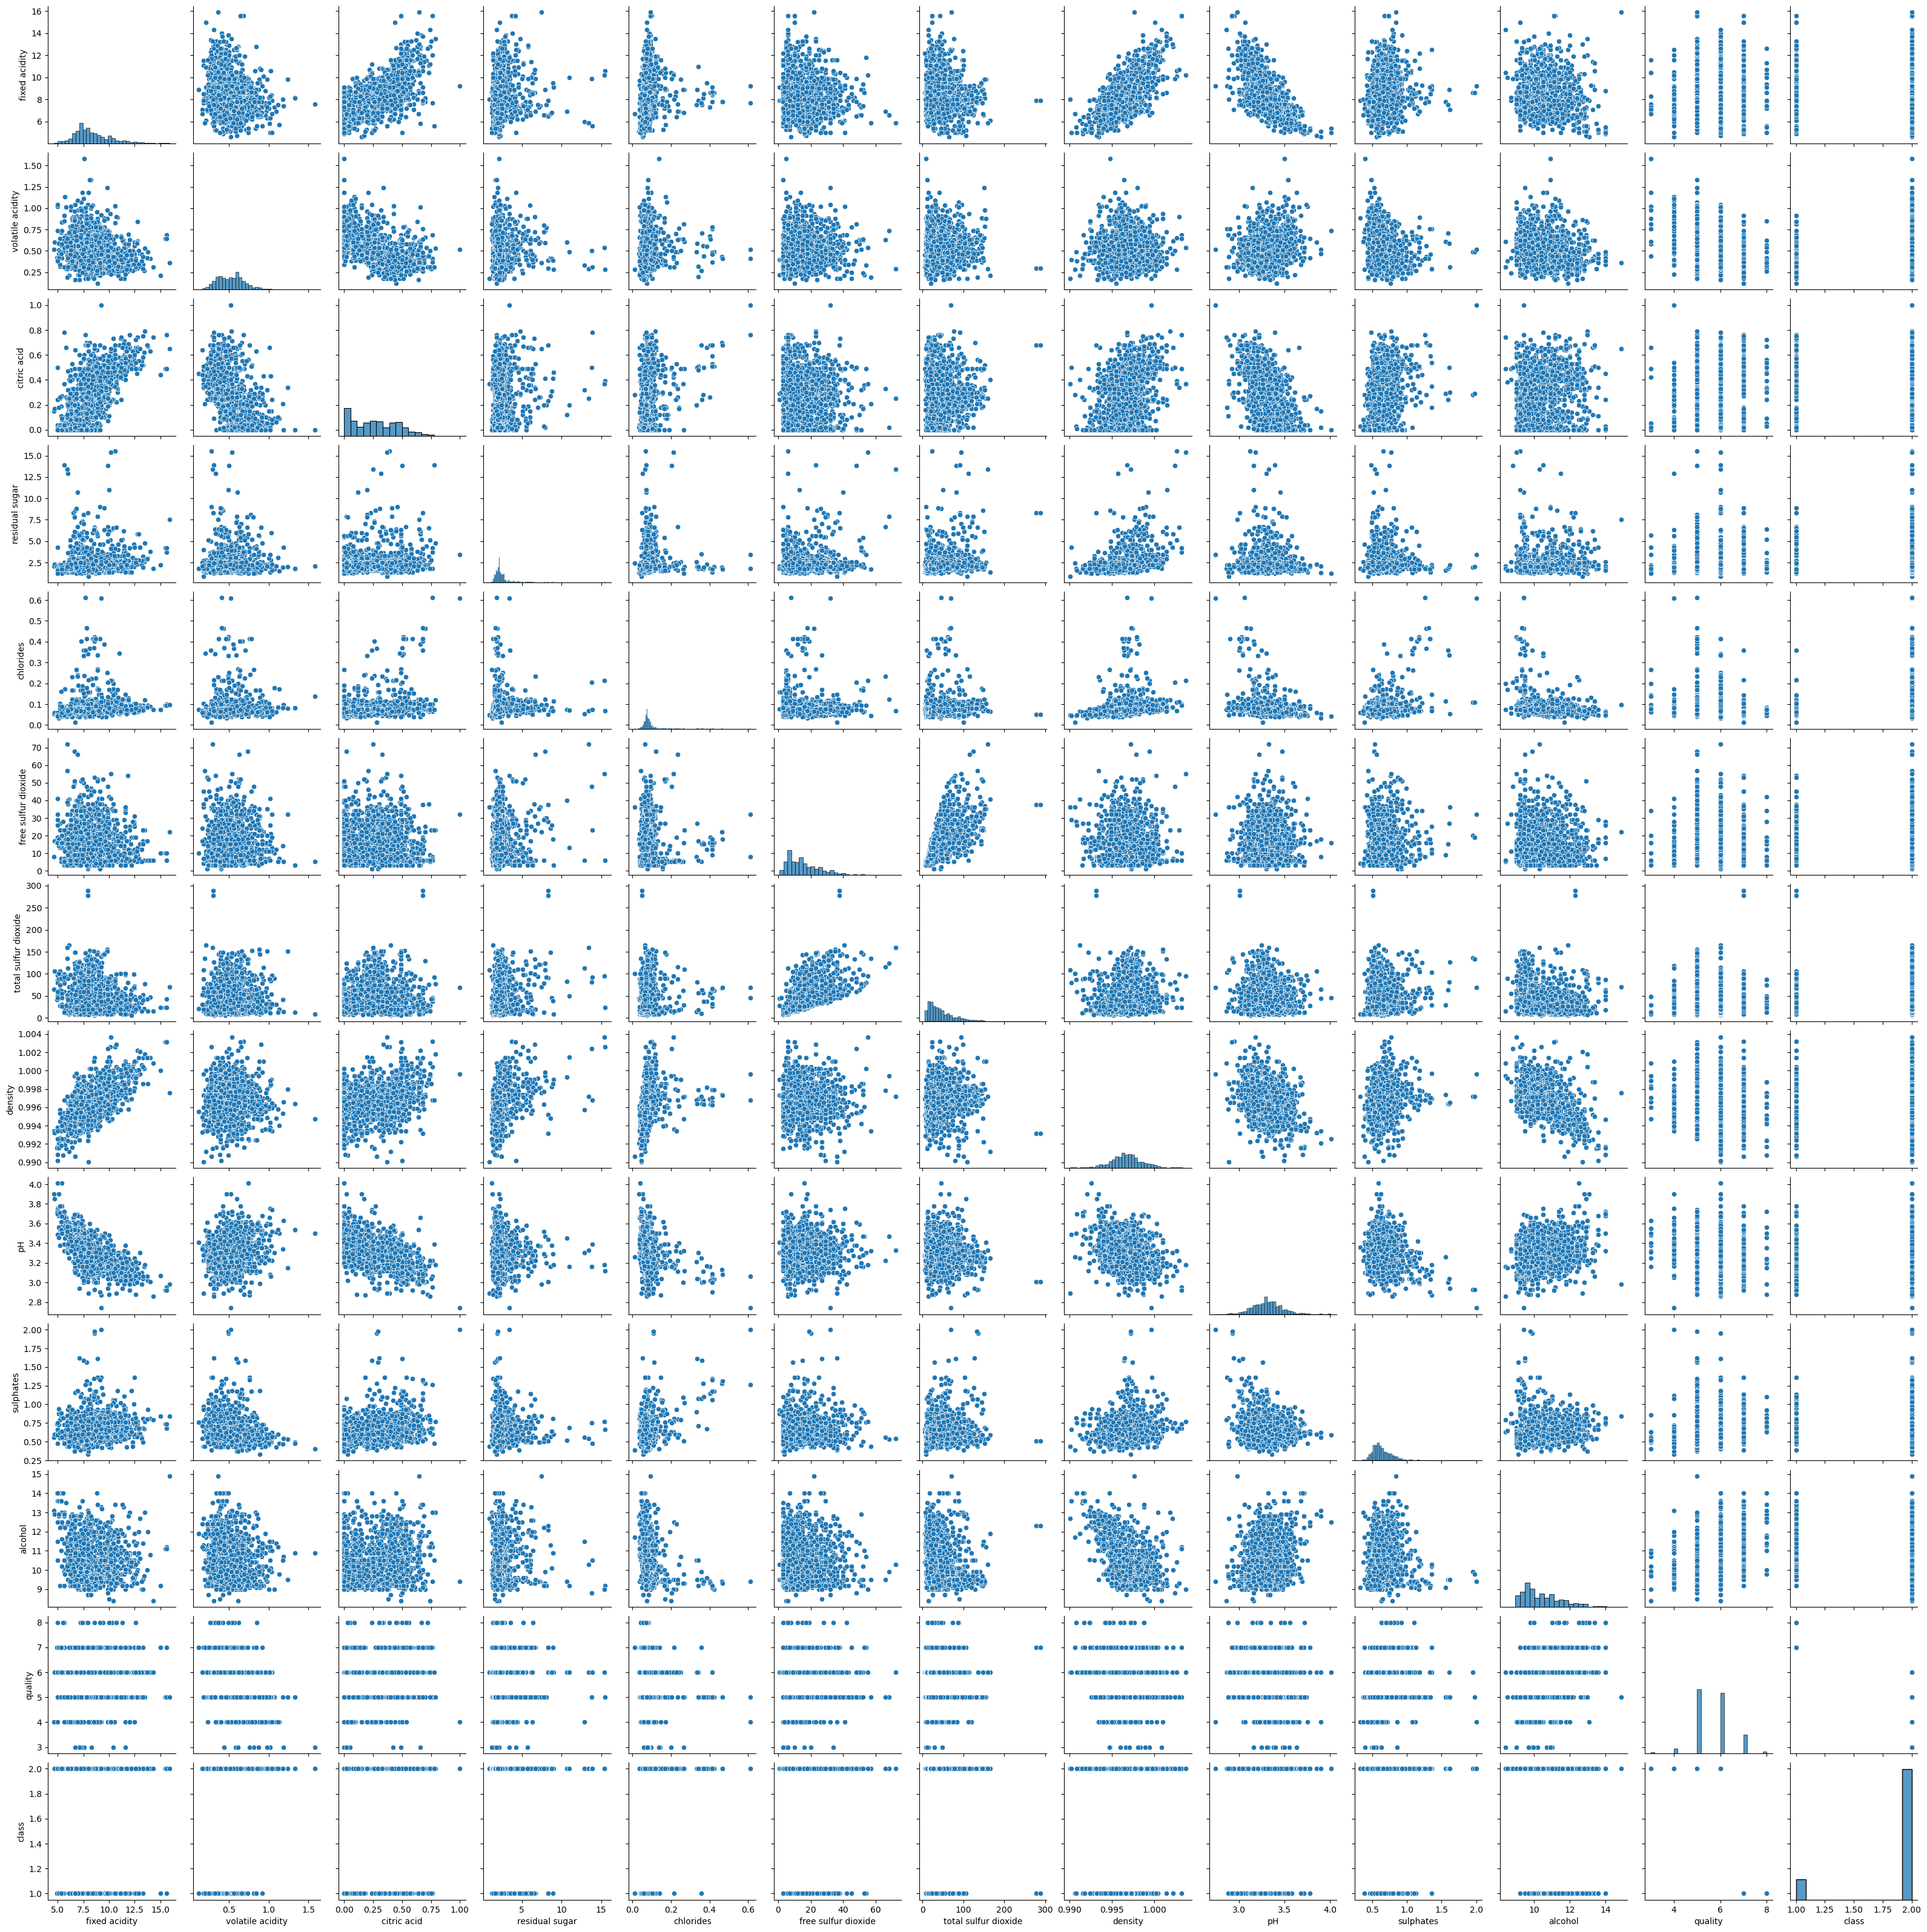

In [79]:
sns.pairplot(df)

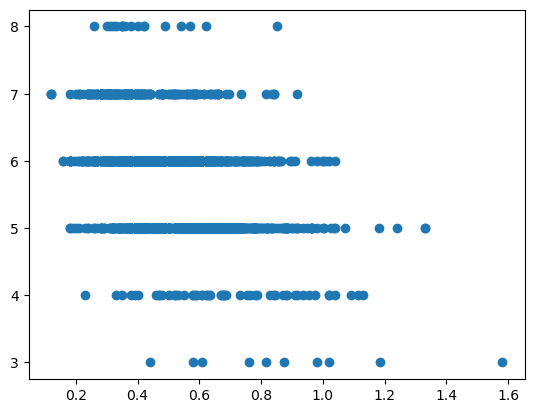

In [33]:
plt.scatter(df['volatile acidity'],df['quality'])
plt.show()

Observation

Here we can see a negative relation between volatile acidity and quality,because as the volatile acidity increases quality decreases

# Feature selection


**Outliers Detection based on IQR**


In [34]:
df1=df.drop(columns='quality')

In [35]:
df2 = df1.copy()
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3-Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
class                    0.000000
dtype: float64


In [36]:
df_new = df2[~((df <(Q1 -1.5*IQR)) | (df>(Q3 + 1.5*IQR))).any(axis=1)]
print(df_new.shape)

(1047, 12)


Data Loss 


In [37]:
print('Percentage Data loss:',((1599-1047)/1599)*100,'%')

Percentage Data loss: 34.52157598499062 %


# Removing Outliers using Z score Method 


In [38]:
from scipy.stats import zscore 
df3 = df1.copy()
z_score = zscore(df3)
z_score_abs = np.abs(z_score)
df_new = df3[(z_score_abs <3).all(axis =1)]
df_new.shape

(1458, 12)

In [39]:
print('Percentage Data loss:',((1599-1458)/1599)*100,'%')

Percentage Data loss: 8.818011257035648 %


Checking the skew

In [40]:
df_new.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
class                  -2.103030
dtype: float64

Removing skewness

In [41]:
from scipy.stats import boxcox

In [42]:
df_new['fixed acidity']=boxcox(df_new['fixed acidity'],0)
df_new['residual sugar']=boxcox(df_new['residual sugar'],-1)
df_new['chlorides']=boxcox(df_new['chlorides'],-0.5)
df_new['free sulfur dioxide']=boxcox(df_new['free sulfur dioxide'],0)
df_new['total sulfur dioxide']=boxcox(df_new['total sulfur dioxide'],0)
df_new['sulphates']=boxcox(df_new['sulphates'],0)
df_new['alcohol']=boxcox(df_new['alcohol'],-0.5)

In [43]:
df_new.skew()

fixed acidity           0.377100
volatile acidity        0.392097
citric acid             0.292600
residual sugar          0.129444
chlorides              -0.174196
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
density                 0.055543
pH                      0.113039
sulphates               0.345344
alcohol                 0.508422
class                  -2.103030
dtype: float64

_______________________________________________________________________________



### Correlation

In [44]:
df_new.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.295813     0.692400   
volatile acidity          -0.295813          1.000000    -0.589286   
citric acid                0.692400         -0.589286     1.000000   
residual sugar             0.216829          0.039221     0.187498   
chlorides                  0.241177          0.080724     0.100659   
free sulfur dioxide       -0.170132          0.046278    -0.107676   
total sulfur dioxide      -0.096951          0.099221    -0.027290   
density                    0.664021         -0.000446     0.372338   
pH                        -0.721165          0.252900    -0.521270   
sulphates                  0.190975         -0.356126     0.308570   
alcohol                   -0.037563         -0.212683     0.162704   
class                     -0.119643          0.268236    -0.226809   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.216829   0.241177            -0.170132   
volatile acidity            0.039221   0.080724             0.046278   
citric acid                 0.187498   0.100659            -0.107676   
residual sugar              1.000000   0.219573             0.034795   
chlorides                   0.219573   1.000000            -0.012947   
free sulfur dioxide         0.034795  -0.012947             1.000000   
total sulfur dioxide        0.126538   0.095544             0.778888   
density                     0.398875   0.414090            -0.041086   
pH                         -0.073404  -0.206719             0.132344   
sulphates                   0.063047  -0.010645             0.045477   
alcohol                     0.152463  -0.278623            -0.090153   
class                      -0.073978   0.144047             0.095752   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.096951  0.664021 -0.721165   0.190975   
volatile acidity                  0.099221 -0.000446  0.252900  -0.356126   
citric acid                      -0.027290  0.372338 -0.521270   0.308570   
residual sugar                    0.126538  0.398875 -0.073404   0.063047   
chlorides                         0.095544  0.414090 -0.206719  -0.010645   
free sulfur dioxide               0.778888 -0.041086  0.132344   0.045477   
total sulfur dioxide              1.000000  0.140454  0.032708   0.006369   
density                           0.140454  1.000000 -0.311217   0.133096   
pH                                0.032708 -0.311217  1.000000  -0.025521   
sulphates                         0.006369  0.133096 -0.025521   1.000000   
alcohol                          -0.269103 -0.462380  0.138230   0.255667   
class                             0.183569  0.154221  0.079528  -0.312522   

                       alcohol     class  
fixed acidity        -0.037563 -0.119643  
volatile acidity     -0.212683  0.268236  
citric acid           0.162704 -0.226809  
residual sugar        0.152463 -0.073978  
chlorides            -0.278623  0.144047  
free sulfur dioxide  -0.090153  0.095752  
total sulfur dioxide -0.269103  0.183569  
density              -0.462380  0.154221  
pH                    0.138230  0.079528  
sulphates             0.255667 -0.312522  
alcohol               1.000000 -0.424230  
class                -0.424230  1.000000

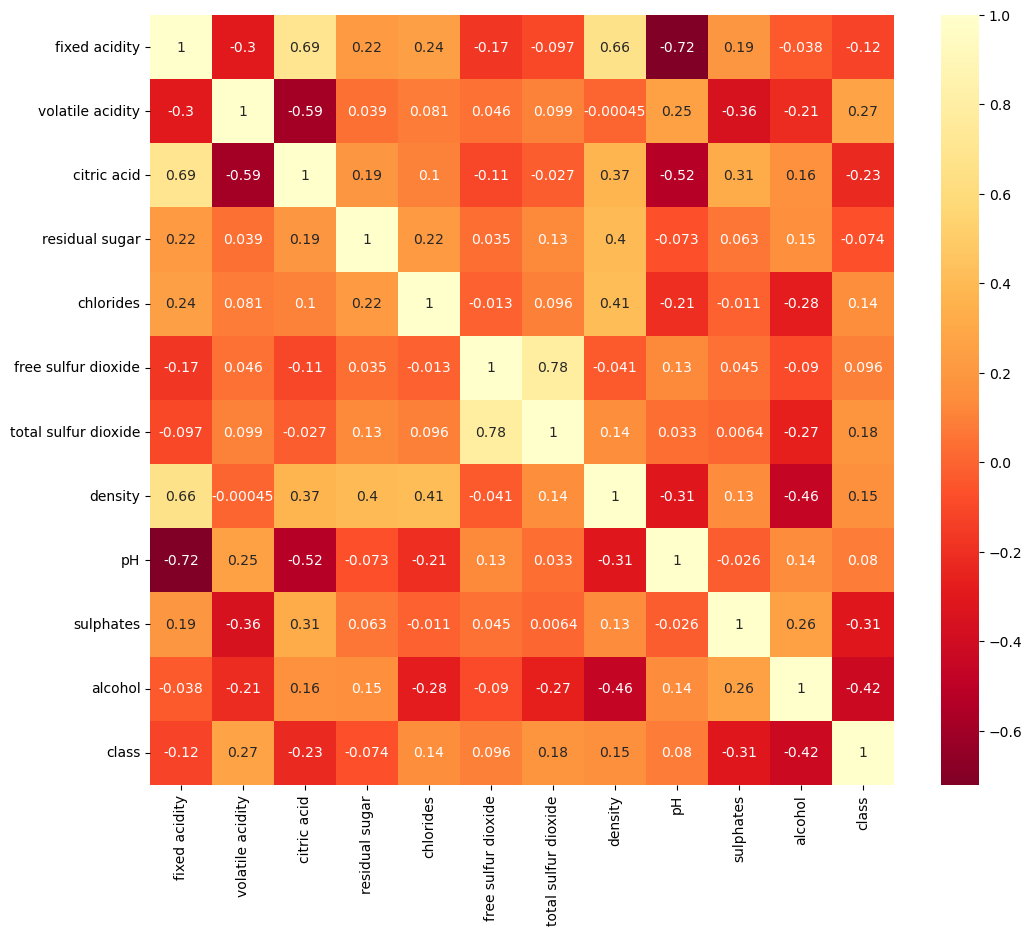

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(df_new.corr(),cmap='YlOrRd_r',annot=True)
plt.tight_layout
plt.show()


Checking multicolinearity b/w features using variance_inflation_factor 


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [47]:
df_new2 = df_new.copy()

In [48]:
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df_new2.values,i) for i in range(df_new2.shape[1])]
vif['Features']= df_new2.columns
vif

vif              Features
0    438.530488         fixed acidity
1     19.152933      volatile acidity
2      8.924499           citric acid
3     28.235859        residual sugar
4     50.842907             chlorides
5     43.111587   free sulfur dioxide
6     89.146379  total sulfur dioxide
7   5967.275741               density
8   1308.561878                    pH
9      8.737683             sulphates
10  3336.321428               alcohol
11    40.765232                 class

pH and density are not contributing to label and als high multicollinearity exists so we will drop them.

In [49]:
df_new2 = df_new2.drop(['density','pH'],axis=1)

In [50]:
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df_new2.values,i) for i in range(df_new2.shape[1])]
vif['Features']= df_new2.columns
vif

vif              Features
0  224.116162         fixed acidity
1   19.018738      volatile acidity
2    8.310589           citric acid
3   27.266641        residual sugar
4   50.561818             chlorides
5   41.688333   free sulfur dioxide
6   77.581633  total sulfur dioxide
7    8.295627             sulphates
8  334.882722               alcohol
9   35.549006                 class

Still there are lot of multicollinearity. So we need to scale data and apply pca dimensionilty reduction technique.

## Standard Scaling 

In [51]:
X =  df_new.drop(columns =['class'])
Y = df_new['class']

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [53]:
X_scale

array([[-0.51360254,  1.0387081 , -1.38741253, ...,  1.37476832,
        -0.60954326, -1.04551382],
       [-0.23702113,  2.10132549, -1.38741253, ..., -0.82375195,
         0.39246697, -0.58517226],
       [-0.23702113,  1.39291389, -1.17821377, ..., -0.3982319 ,
         0.15960713, -0.58517226],
       ...,
       [-1.35910388, -0.0829436 , -0.70751654, ...,  0.73648824,
         0.89812923,  0.64182987],
       [-1.70374108,  0.71401945, -0.75981623, ...,  1.80028837,
         0.6152721 , -0.15218234],
       [-1.61543928, -1.26362959,  1.07067297, ...,  0.52372821,
         0.23840028,  0.64182987]])

## PCA

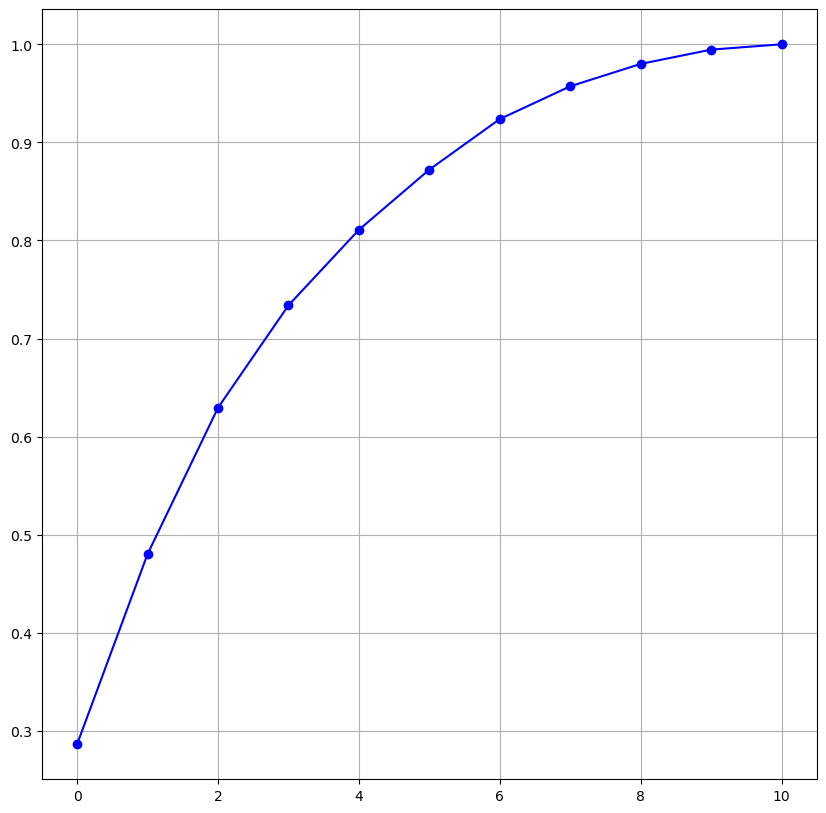

In [54]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'bo-')
plt.grid()

As per the graph, we can see that 8 principal components attribute for 90% of variation in the data. We shall pick the first 8 components for our prediction

In [55]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(X_scale)
print(x_new)

[[ 1.68650741e+00 -1.13427713e+00  1.20466448e+00 ... -8.36247920e-01
  -2.80279751e-01 -4.99499195e-01]
 [ 6.94317615e-01 -2.37831525e+00  1.67711310e-01 ...  2.59097937e-01
   1.86103085e+00  8.57316030e-01]
 [ 6.25870099e-01 -1.60320594e+00  5.11187315e-01 ...  1.11415879e-01
   1.10007379e+00  5.67815471e-01]
 ...
 [ 1.52905689e+00 -8.18231397e-03 -1.51777109e+00 ...  2.95236388e-01
   1.74538537e-01  3.66013706e-01]
 [ 2.60038294e+00 -6.48382815e-01 -1.18250554e+00 ... -3.77583301e-02
  -1.31893672e-03 -2.86682942e-01]
 [ 4.02630212e-01  7.89189967e-01 -1.87281620e+00 ...  1.93469807e-01
  -1.56509536e+00  7.27199628e-01]]


# Machine Learning Model Building 


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(x_new, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1020, 8)
Training target vector size: (1020,)
Test feature matrix size: (438, 8)
Test target vector size: (438,)


**Finding Best Random State**

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(x_new,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9246575342465754 on Random_state 133


## Logistic Regression

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(x_new, Y, random_state=133, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)

In [93]:
print("Accuracy Score of Logistics Regression:", accuracy_score(Y_test, y_pred))
print('\n')
print("Confusion matrix of Logistics Regression :"'\n',confusion_matrix(Y_test, y_pred))
print('\n')
print("classification Report of Logistics Regression:"'\n',classification_report(Y_test, y_pred))


Accuracy Score of Logistics Regression: 0.9128630705394191


Confusion matrix of Logistics Regression :
 [[ 20  32]
 [ 10 420]]


classification Report of Logistics Regression:
               precision    recall  f1-score   support

           1       0.67      0.38      0.49        52
           2       0.93      0.98      0.95       430

    accuracy                           0.91       482
   macro avg       0.80      0.68      0.72       482
weighted avg       0.90      0.91      0.90       482



# __________________________________


## Finding Optimal value of n_neighbors for KNN

In [94]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.34986660172721457
RMSE value for k=  2 is: 0.40227568425282534
RMSE value for k=  3 is: 0.3408556477661884
RMSE value for k=  4 is: 0.35865123085553585
RMSE value for k=  5 is: 0.33159991891444485
RMSE value for k=  6 is: 0.3615320099118076
RMSE value for k=  7 is: 0.32528315147069237
RMSE value for k=  8 is: 0.32845672078279337
RMSE value for k=  9 is: 0.31226651028245633
RMSE value for k=  10 is: 0.32528315147069237
RMSE value for k=  11 is: 0.31226651028245633
RMSE value for k=  12 is: 0.32528315147069237
RMSE value for k=  13 is: 0.3089266654843879
RMSE value for k=  14 is: 0.32207831320041547
RMSE value for k=  15 is: 0.31226651028245633
RMSE value for k=  16 is: 0.32528315147069237
RMSE value for k=  17 is: 0.31226651028245633
RMSE value for k=  18 is: 0.32207831320041547
RMSE value for k=  19 is: 0.32528315147069237
RMSE value for k=  20 is: 0.31884126307199384


<Axes: >

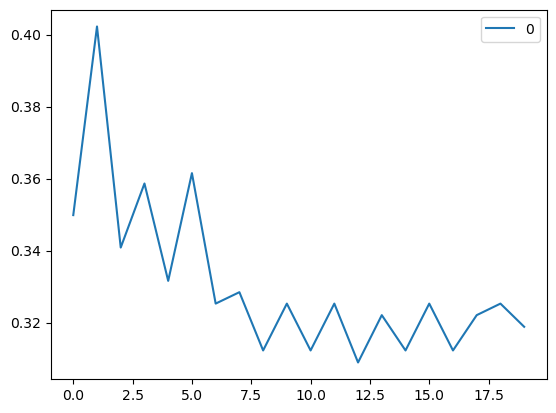

In [72]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

At k= 12, the RMSE is approximately 0.29868314022934306, and shoots up on further increasing the k value. We can safely say that k=12 will give us the best result in this case

In [73]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('==================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.9128630705394191


Confusion matrix : 
 [[ 21  31]
 [ 11 419]]


Classification Report : 
               precision    recall  f1-score   support

           1       0.66      0.40      0.50        52
           2       0.93      0.97      0.95       430

    accuracy                           0.91       482
   macro avg       0.79      0.69      0.73       482
weighted avg       0.90      0.91      0.90       482



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.9087136929460581


Confusion matrix : 
 [[ 21  31]
 [ 13 417]]


Classification Report : 
               precision    recall  f1-score   support

           1       0.62      0.40      0.49        52
           2       0.93      0.97      0.95       430

    accuracy                           0.91       482
   macro avg       0.77      0.69      0.72       482
weighted avg       0.90      0.91      0.90       482




We can see that RandomForestClassifier() gives maximum Accuracy so we will continue further investigation with crossvalidation of above model

# CrossValidation :


In [75]:
from sklearn.model_selection import cross_val_score
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score SVC() :

Score : [0.8630137  0.8630137  0.85958904 0.86254296 0.86254296]
Mean Score : 0.8621404698018171
Std deviation : 0.0012929682756927664




Cross Validation Score GaussianNB() :

Score : [0.89383562 0.75342466 0.8869863  0.74226804 0.87972509]
Mean Score : 0.8312479404980465
Std deviation : 0.06833432742537314




Cross Validation Score DecisionTreeClassifier() :

Score : [0.8630137  0.82191781 0.86643836 0.7766323  0.80068729]
Mean Score : 0.825737890128513
Std deviation : 0.03492706232283845




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.86986301 0.76369863 0.84589041 0.82474227 0.85223368]
Mean Score : 0.8312855999623405
Std deviation : 0.03674548398972909




Cross Validation Score RandomForestClassifier() :

Score : [0.89383562 0.8630137  0.86986301 0.8556701  0.86941581]
Mean Score : 0.8703596478840089
Std deviation : 0.012821889691068433




Cross Validation Score AdaBoostClassifier() :

Score : [0.88013699 0.842465

we can see that Random Forest Classifier gives maximum Accuracy. So we will apply Hyperparameter tuning on Random Forest model

# Hyper Parameter Tuning : GridSearchCV


In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],
             'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [79]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 50, 60]})

In [80]:

GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 60}

# Final Model


In [81]:
Final_mod = RandomForestClassifier(criterion='entropy',n_estimators= 50, max_depth=20 ,max_features='sqrt')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.9128630705394191


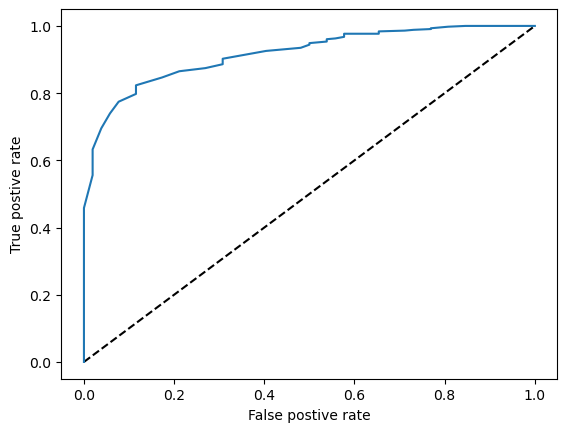

Auc Score :
 0.6975849731663686


In [97]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
Y_test_binary = (Y_test == 2).astype(int)
fpr, tpr, thresholds = roc_curve(Y_test_binary,y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model


In [98]:
import joblib
joblib.dump(Final_mod,'Red_Wine_Quality_Final.pkl')

['Red_Wine_Quality_Final.pkl']